<a href="https://colab.research.google.com/github/benitovasquez/Portafolio-Dev-Data/blob/main/EDA_Supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supermarket sales**

Historical record of sales data in 3 different supermarkets


**About Dataset**
Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

Invoice id: Computer generated sales slip invoice identification number
Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Acknowledgements
Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

Purpose
This dataset can be used for predictive data analytics purpose.

**1️⃣ Subir la API Key de Kaggle a Google Colab**


In [2]:
"Data sacada de Kaggle https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales"
from google.colab import files
import os
import shutil

# Crear la carpeta donde se guardará el archivo kaggle.json
os.makedirs("supermarket-sales", exist_ok=True)

# Subir el archivo kaggle.json
uploaded = files.upload()

# Get the actual filename of the uploaded file
uploaded_filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Verificar si el archivo fue subido
if uploaded_filename:
    # Mover el archivo a la carpeta supermarket-sales, using the actual filename
    shutil.move(uploaded_filename, "supermarket-sales/" + uploaded_filename)
    print(f"{uploaded_filename} movido a supermarket-sales/")
    # Ajustar permisos para evitar problemas de acceso, using the actual filename
    os.chmod("supermarket-sales/" + uploaded_filename, 600) # changed to the actual name
else:
    print("Error: No se encontró kaggle.json")

Saving kaggle.json to kaggle.json
kaggle.json movido a supermarket-sales/


**2️⃣ Instalar y Usar la API de Kaggle**

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d aungpyaeap/supermarket-sales -p supermarket-sales/

Dataset URL: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales
License(s): other
  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 48.6MB/s]


***3️⃣ Descomprimir y Cargar el Dataset***

In [5]:
# Extraer el archivo en la carpeta correcta
import zipfile
with zipfile.ZipFile("supermarket-sales/supermarket-sales.zip", "r") as zip_ref:
    zip_ref.extractall("supermarket-sales/")

In [6]:
#Convertir un datase supermarket_sales - Sheet1
import pandas as pd
df = pd.read_csv("supermarket-sales/supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**4️⃣ Limpieza de Datos**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
#Renombrar Columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5%                   1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

📌 Manejo de Datos Faltantes

In [9]:
print(df.isnull().sum())

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64


📌 Manejo de Tipo de Datos

In [10]:
df.dtypes

,0
invoice_id,object
branch,object
city,object
customer_type,object
gender,object
product_line,object
unit_price,float64
quantity,int64
tax_5%,float64
total,float64


In [11]:
import pandas as pd
import datetime

# Convertir 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Convertir 'time' a formato de hora
df['time'] = pd.to_datetime(df['time'].astype(str)).dt.time

# Convertir columnas numéricas a su tipo correcto
numeric_columns = ['unit_price', 'quantity', 'tax_5%', 'total', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir 'quantity, city' a entero
df['quantity'] = df['quantity'].astype('int64')

# Convertir columnas categóricas a tipo 'category'
categorical_columns = ['branch', 'city' , 'customer_type', 'gender', 'product_line', 'payment']

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Mostrar los tipos de datos después de la conversión
print(df.dtypes)

invoice_id                         object
branch                           category
city                             category
customer_type                    category
gender                           category
product_line                     category
unit_price                        float64
quantity                            int64
tax_5%                            float64
total                             float64
date                       datetime64[ns]
time                               object
payment                          category
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
rating                            float64
dtype: object


<ipython-input-11-52be28172ac3>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'].astype(str)).dt.time


5️⃣ Análisis Descriptivo 📊


Análisis descriptivo de la variable: branch
count     1000
unique       3
top          A
freq       340
Name: branch, dtype: object
        Count  Percentage
branch                   
A         340        34.0
B         332        33.2
C         328        32.8


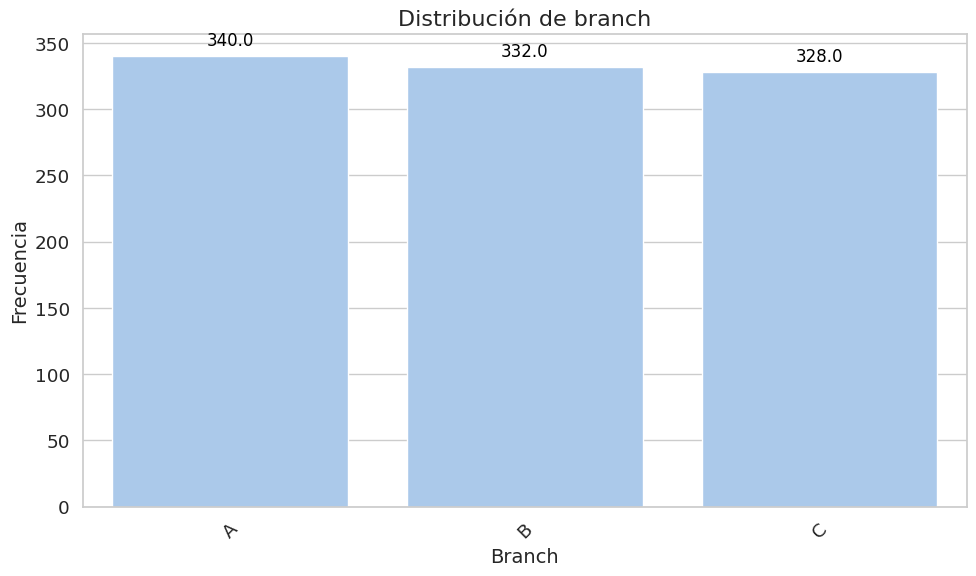


Análisis descriptivo de la variable: city
count       1000
unique         3
top       Yangon
freq         340
Name: city, dtype: object
           Count  Percentage
city                        
Yangon       340        34.0
Mandalay     332        33.2
Naypyitaw    328        32.8


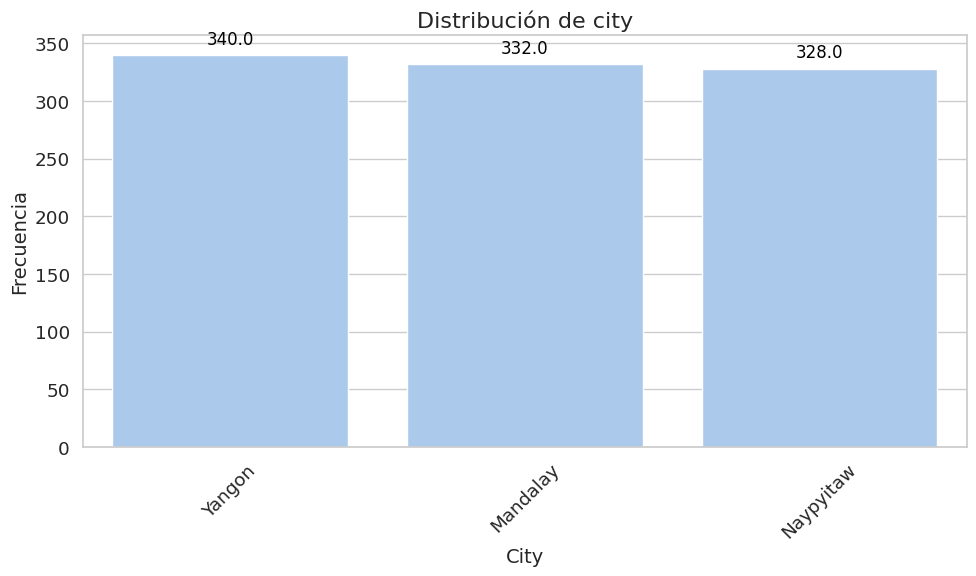


Análisis descriptivo de la variable: customer_type
count       1000
unique         2
top       Member
freq         501
Name: customer_type, dtype: object
               Count  Percentage
customer_type                   
Member           501        50.1
Normal           499        49.9


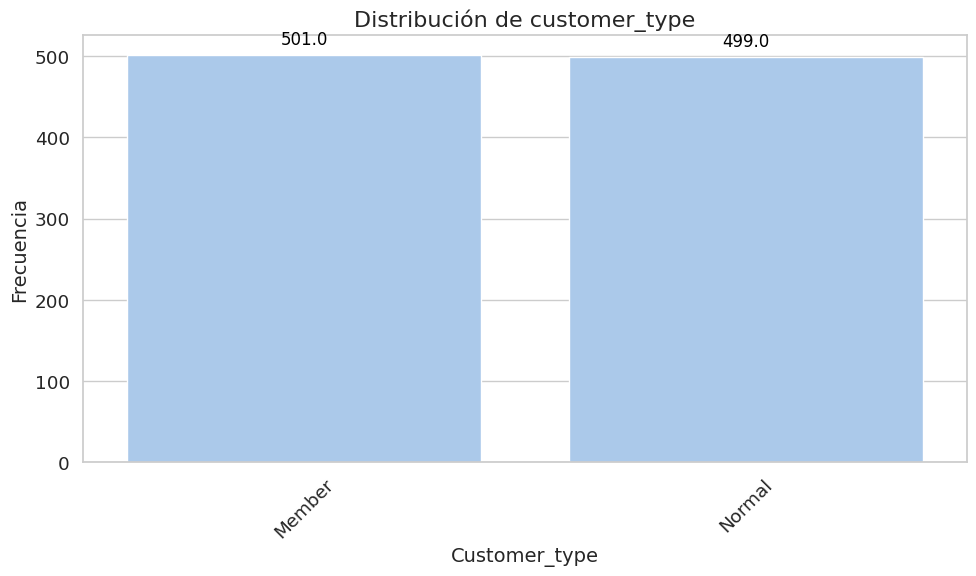


Análisis descriptivo de la variable: gender
count       1000
unique         2
top       Female
freq         501
Name: gender, dtype: object
        Count  Percentage
gender                   
Female    501        50.1
Male      499        49.9


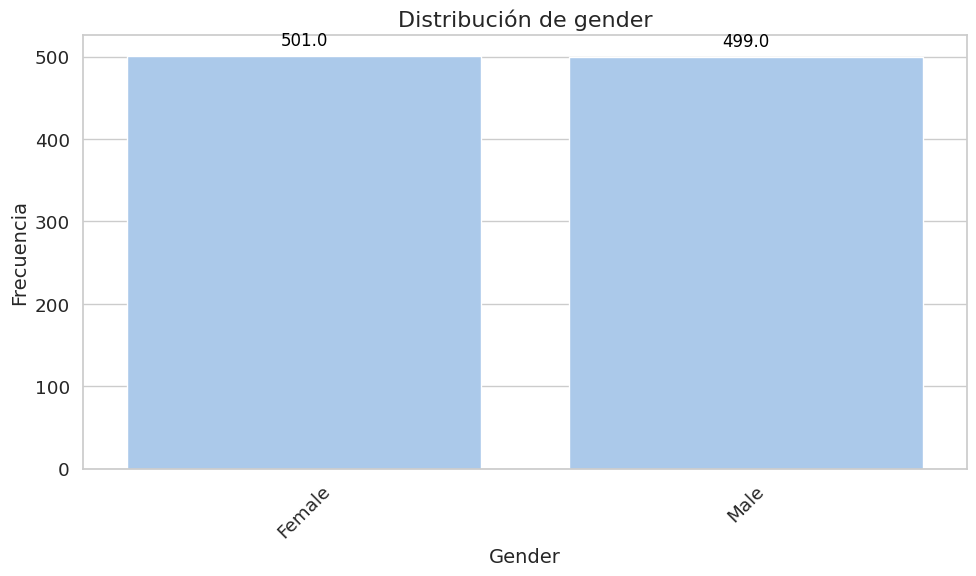


Análisis descriptivo de la variable: product_line
count                    1000
unique                      6
top       Fashion accessories
freq                      178
Name: product_line, dtype: object
                        Count  Percentage
product_line                             
Fashion accessories       178        17.8
Food and beverages        174        17.4
Electronic accessories    170        17.0
Sports and travel         166        16.6
Home and lifestyle        160        16.0
Health and beauty         152        15.2


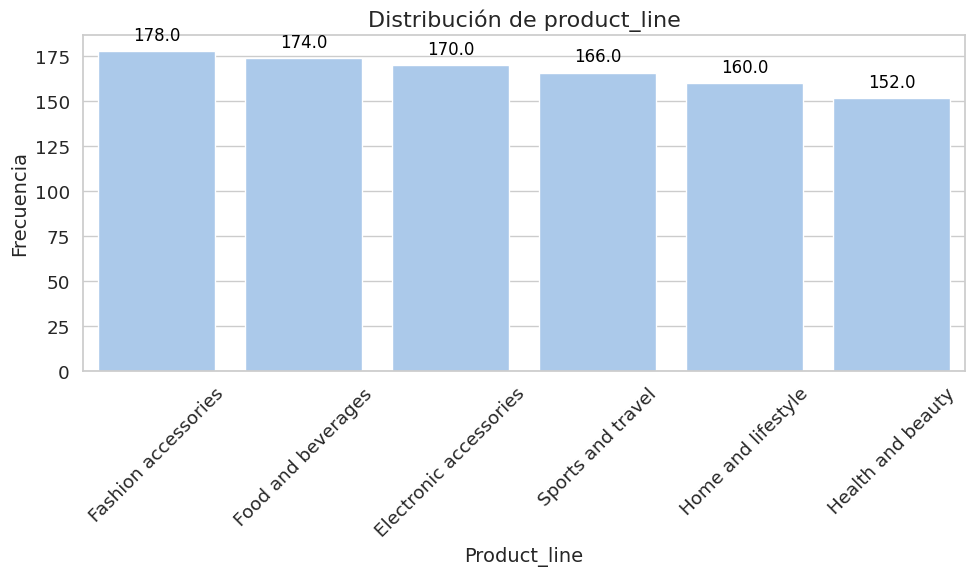


Análisis descriptivo de la variable: payment
count        1000
unique          3
top       Ewallet
freq          345
Name: payment, dtype: object
             Count  Percentage
payment                       
Ewallet        345        34.5
Cash           344        34.4
Credit card    311        31.1


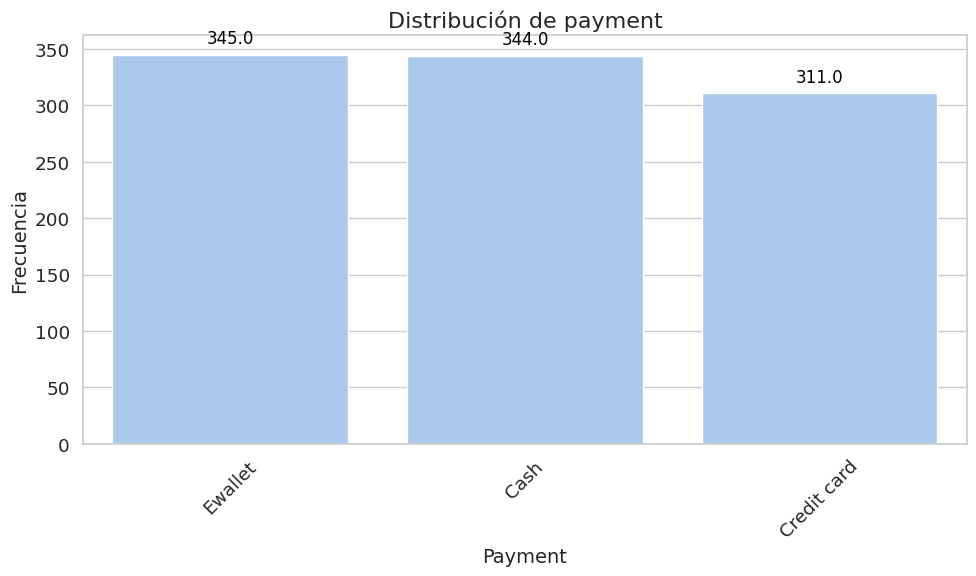

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style='whitegrid', palette='pastel', font_scale=1.2)

categorical_columns = ['branch', 'city', 'customer_type', 'gender', 'product_line', 'payment']

for col in categorical_columns:
    print(f"\nAnálisis descriptivo de la variable: {col}")

    # Descripción estadística básica
    desc = df[col].describe()
    print(desc)

    # Cálculo de conteos y porcentajes
    value_counts = df[col].value_counts()
    percentages = (df[col].value_counts(normalize=True) * 100).round(2)
    summary_df = pd.concat([value_counts, percentages], axis=1, keys=['Count', 'Percentage'])
    print(summary_df)

    # Gráfico de distribución con anotaciones
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}', fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.xticks(rotation=45)

    # Añadir anotaciones en cada barra del gráfico
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Interpretación Descriptiva de Variables Categóricas

A continuación se presenta la interpretación puntual de cada variable categórica basándose en los datos obtenidos:

---

## **1. Variable: branch**

- **Descripción Estadística:**
  - **Count:** 1000 registros.
  - **Unique:** 3 ramas diferentes.
  - **Top:** La rama más frecuente es **A** con 340 registros.
  - **Frecuencia Relativa:**  
    - **A:** 34.0%  
    - **B:** 33.2%  
    - **C:** 32.8%

- **Interpretación:**  
  La distribución de registros entre las tres ramas es casi equitativa, lo que indica una representación balanceada de datos para cada una de las sucursales del supermercado. La ligera mayor cantidad en la rama A (34.0%) puede no ser significativa, dado que la diferencia con las demás es mínima.

---

## **2. Variable: city**

- **Descripción Estadística:**
  - **Count:** 1000 registros.
  - **Unique:** 3 ciudades.
  - **Top:** La ciudad más representada es **Yangon** con 340 registros.
  - **Frecuencia Relativa:**  
    - **Yangon:** 34.0%  
    - **Mandalay:** 33.2%  
    - **Naypyitaw:** 32.8%

- **Interpretación:**  
  La distribución de ventas es muy similar entre las tres ciudades, lo que sugiere que no hay una concentración marcada en ninguna de ellas. Yangon tiene una ligera ventaja, pero en términos generales, los datos reflejan un equilibrio en la representación de las ciudades.

---

## **3. Variable: customer_type**

- **Descripción Estadística:**
  - **Count:** 1000 registros.
  - **Unique:** 2 tipos de clientes.
  - **Top:** El tipo más frecuente es **Member** con 501 registros.
  - **Frecuencia Relativa:**  
    - **Member:** 50.1%  
    - **Normal:** 49.9%

- **Interpretación:**  
  La base de clientes está prácticamente balanceada entre miembros (Member) y no miembros (Normal). La distribución casi 50/50 indica que el programa de membresía podría estar funcionando de forma equitativa, o bien que los clientes sin membresía representan una proporción similar a los miembros.

---

## **4. Variable: gender**

- **Descripción Estadística:**
  - **Count:** 1000 registros.
  - **Unique:** 2 géneros.
  - **Top:** El género más frecuente es **Female** con 501 registros.
  - **Frecuencia Relativa:**  
    - **Female:** 50.1%  
    - **Male:** 49.9%

- **Interpretación:**  
  La distribución de género es casi equitativa, lo que indica que tanto mujeres como hombres están representados de forma similar en el conjunto de datos. Esta paridad es útil para realizar análisis sin sesgos de género.

---

## **5. Variable: product_line**

- **Descripción Estadística:**
  - **Count:** 1000 registros.
  - **Unique:** 6 líneas de productos.
  - **Top:** La línea de producto más común es **Fashion accessories** con 178 registros.
  - **Frecuencia Relativa:**  
    - **Fashion accessories:** 17.8%  
    - **Food and beverages:** 17.4%  
    - **Electronic accessories:** 17.0%  
    - **Sports and travel:** 16.6%  
    - **Home and lifestyle:** 16.0%  
    - **Health and beauty:** 15.2%

- **Interpretación:**  
  La oferta de productos está bastante diversificada, con una distribución relativamente balanceada entre las diferentes líneas. Aunque **Fashion accessories** tiene la mayor representación (17.8%), la diferencia con las otras categorías es pequeña, lo que indica una variedad amplia y homogénea en las ventas de productos.

---

## **6. Variable: payment**

- **Descripción Estadística:**
  - **Count:** 1000 registros.
  - **Unique:** 3 métodos de pago.
  - **Top:** El método de pago más utilizado es **Ewallet** con 345 registros.
  - **Frecuencia Relativa:**  
    - **Ewallet:** 34.5%  
    - **Cash:** 34.4%  
    - **Credit card:** 31.1%

- **Interpretación:**  
  Los métodos de pago muestran una distribución casi equitativa, con **Ewallet** y **Cash** liderando ligeramente y muy cercanos entre sí, mientras que **Credit card** se utiliza algo menos. Esto sugiere que los clientes tienen preferencias variadas y que la oferta de métodos de pago es adecuada para cubrir diferentes necesidades.



Variable: unit_price
 - Límite Inferior: -34.72
 - Límite Superior: 145.53
 - Número de Outliers: 0


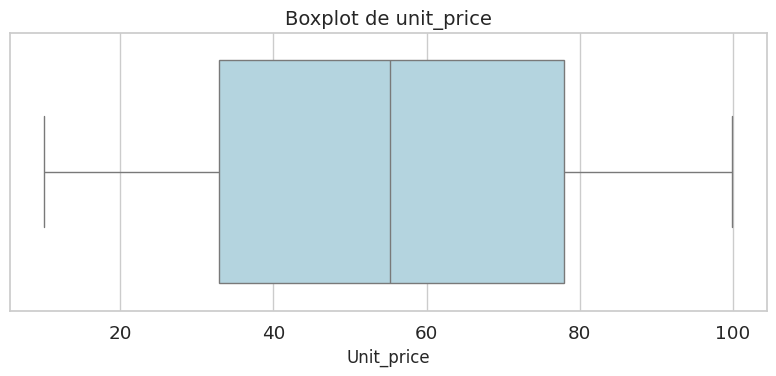


Variable: quantity
 - Límite Inferior: -4.50
 - Límite Superior: 15.50
 - Número de Outliers: 0


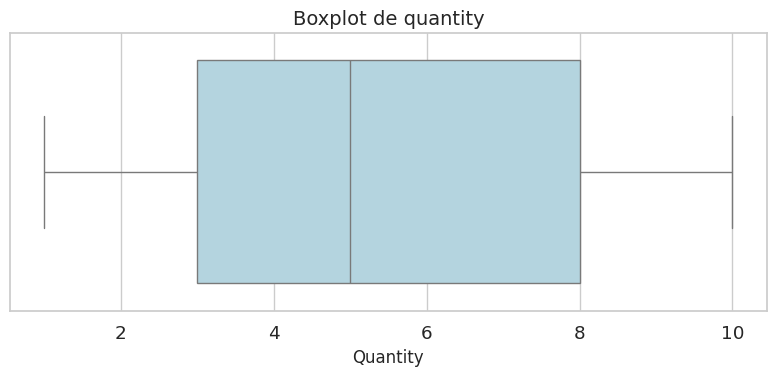


Variable: tax_5%
 - Límite Inferior: -18.86
 - Límite Superior: 47.23
 - Número de Outliers: 9
Ejemplos de outliers:
     tax_5%
166  47.790
167  49.490
350  49.650
357  47.720
422  48.605 



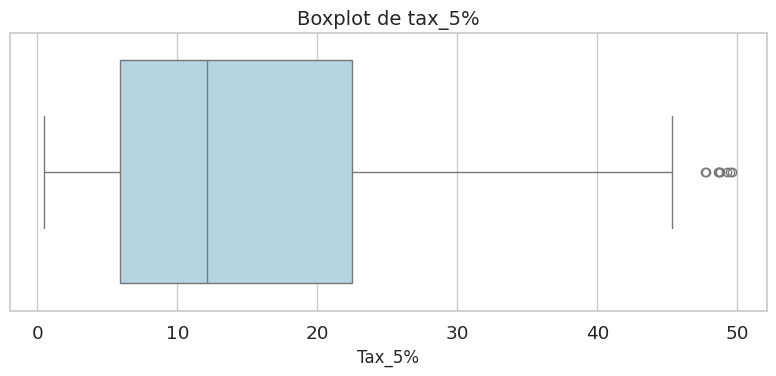


Variable: total
 - Límite Inferior: -395.97
 - Límite Superior: 991.74
 - Número de Outliers: 9
Ejemplos de outliers:
        total
166  1003.590
167  1039.290
350  1042.650
357  1002.120
422  1020.705 



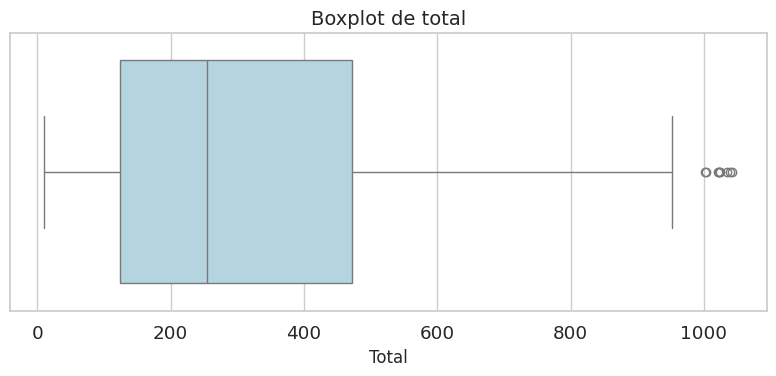


Variable: cogs
 - Límite Inferior: -377.11
 - Límite Superior: 944.52
 - Número de Outliers: 9
Ejemplos de outliers:
      cogs
166  955.8
167  989.8
350  993.0
357  954.4
422  972.1 



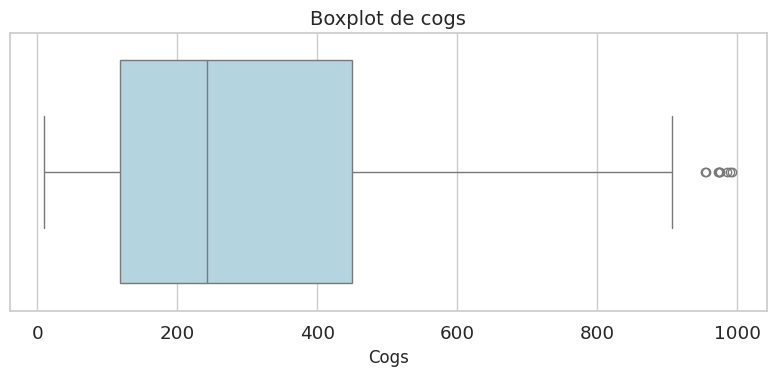


Variable: gross_margin_percentage
 - Límite Inferior: 4.76
 - Límite Superior: 4.76
 - Número de Outliers: 0


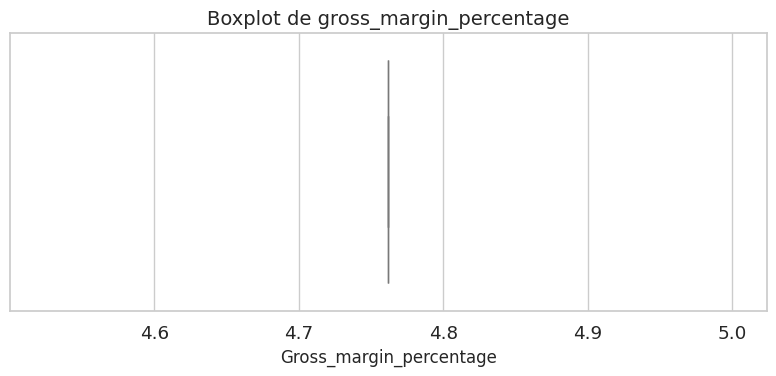


Variable: gross_income
 - Límite Inferior: -18.86
 - Límite Superior: 47.23
 - Número de Outliers: 9
Ejemplos de outliers:
     gross_income
166        47.790
167        49.490
350        49.650
357        47.720
422        48.605 



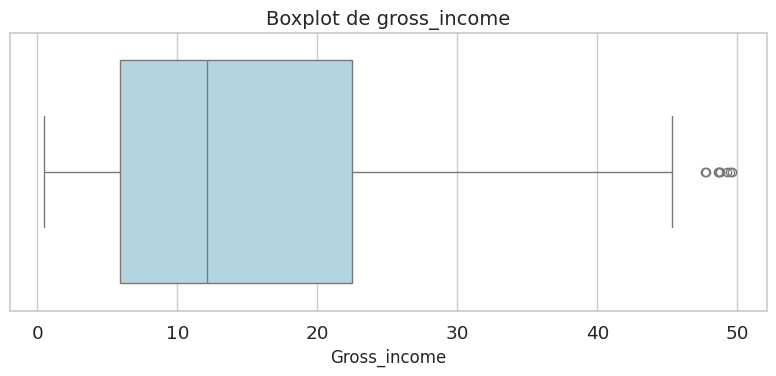


Variable: rating
 - Límite Inferior: 1.00
 - Límite Superior: 13.00
 - Número de Outliers: 0


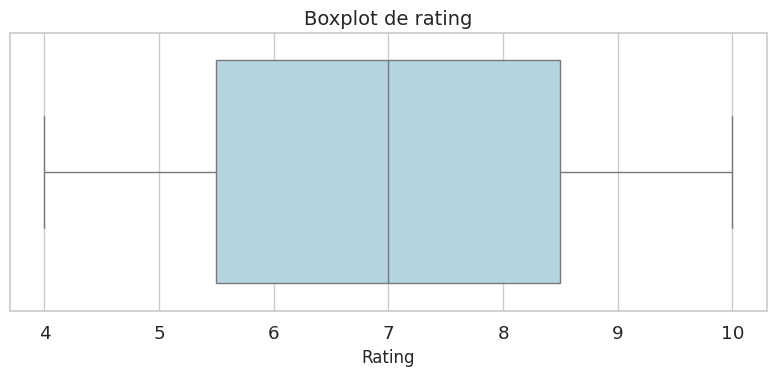


Resumen de Outliers:
                         Count  Lower Bound  Upper Bound
unit_price                   0   -34.715000   145.525000
quantity                     0    -4.500000    15.500000
tax_5%                       9   -18.855688    47.225813
total                        9  -395.969438   991.742062
cogs                         9  -377.113750   944.516250
gross_margin_percentage      0     4.761905     4.761905
gross_income                 9   -18.855688    47.225813
rating                       0     1.000000    13.000000


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables cuantitativas (excluyendo identificadores y variables no numéricas)
quantitative_columns = ['unit_price', 'quantity', 'tax_5%', 'total', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating']

# Diccionario para almacenar el resumen de outliers
outliers_summary = {}

# Iterar sobre cada variable cuantitativa
for col in quantitative_columns:
    # Calcular percentiles e IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Almacenar el resumen en el diccionario
    outliers_summary[col] = {
        "Count": outliers.shape[0],
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    }

    # Mostrar resultados
    print(f"\nVariable: {col}")
    print(f" - Límite Inferior: {lower_bound:.2f}")
    print(f" - Límite Superior: {upper_bound:.2f}")
    print(f" - Número de Outliers: {outliers.shape[0]}")
    if outliers.shape[0] > 0:
        print("Ejemplos de outliers:")
        print(outliers[[col]].head(), "\n")

    # Visualización: Boxplot con outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.tight_layout()
    plt.show()

# Resumen general de outliers por variable
summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')
print("\nResumen de Outliers:")
print(summary_df)

In [14]:
# Eliminar outliers del DataFrame 'df' basado en el diccionario 'outliers_summary'

for col, summary in outliers_summary.items():
    lower_bound = summary["Lower Bound"]
    upper_bound = summary["Upper Bound"]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nDataFrame después de eliminar outliers:")
df.shape


DataFrame después de eliminar outliers:


(991, 17)


Análisis descriptivo de la variable: unit_price
count    991.000000
mean      55.292482
std       26.311619
min       10.080000
25%       32.665000
50%       54.840000
75%       77.485000
max       99.960000
Name: unit_price, dtype: float64
Mediana: 54.84
Moda: 83.77
Asimetría: 0.01
Curtosis: -1.21


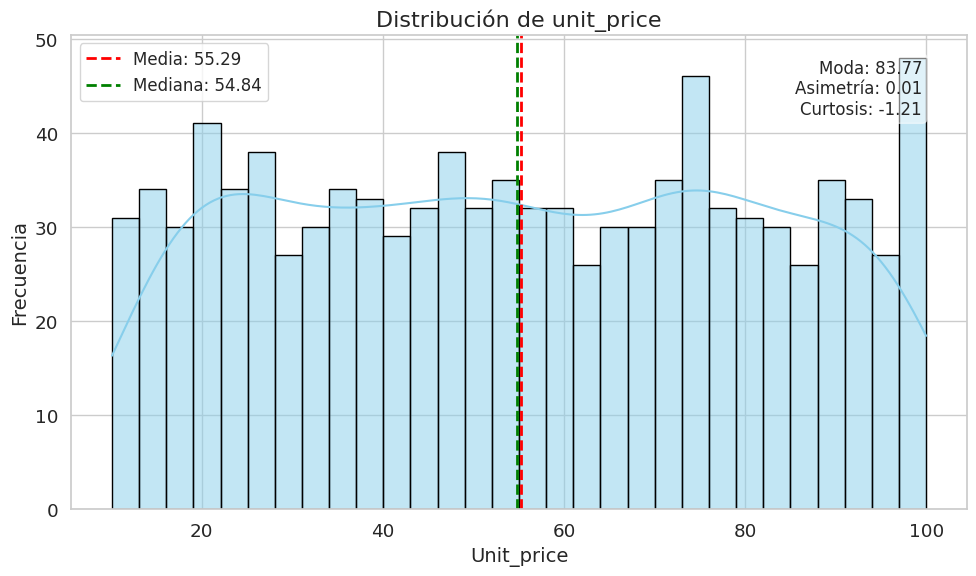


Análisis descriptivo de la variable: quantity
count    991.000000
mean       5.469223
std        2.905031
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: quantity, dtype: float64
Mediana: 5.00
Moda: 1.00
Asimetría: 0.02
Curtosis: -1.21


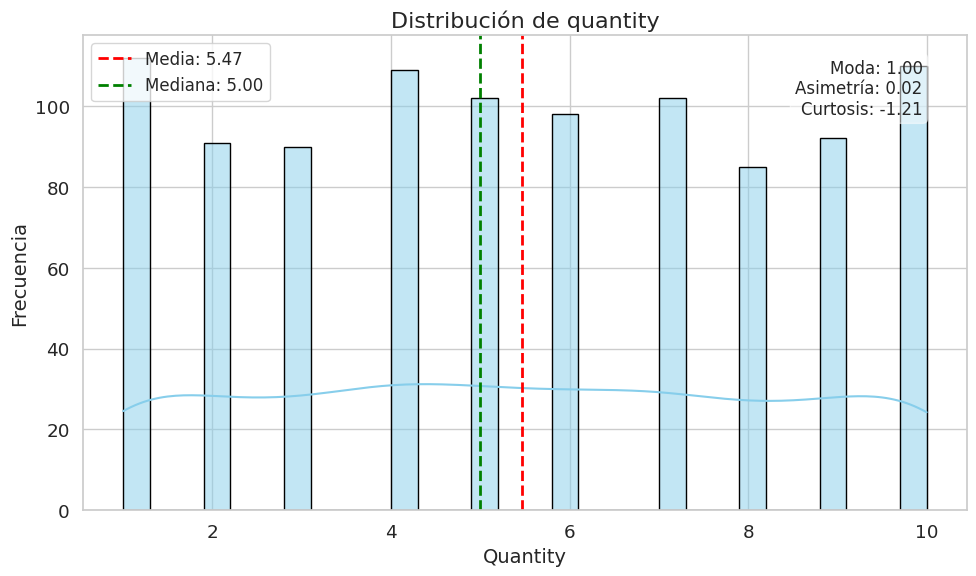


Análisis descriptivo de la variable: tax_5%
count    991.000000
mean      15.076417
std       11.319504
min        0.508500
25%        5.817500
50%       12.036000
75%       22.127000
max       45.325000
Name: tax_5%, dtype: float64
Mediana: 12.04
Moda: 4.15
Asimetría: 0.84
Curtosis: -0.23


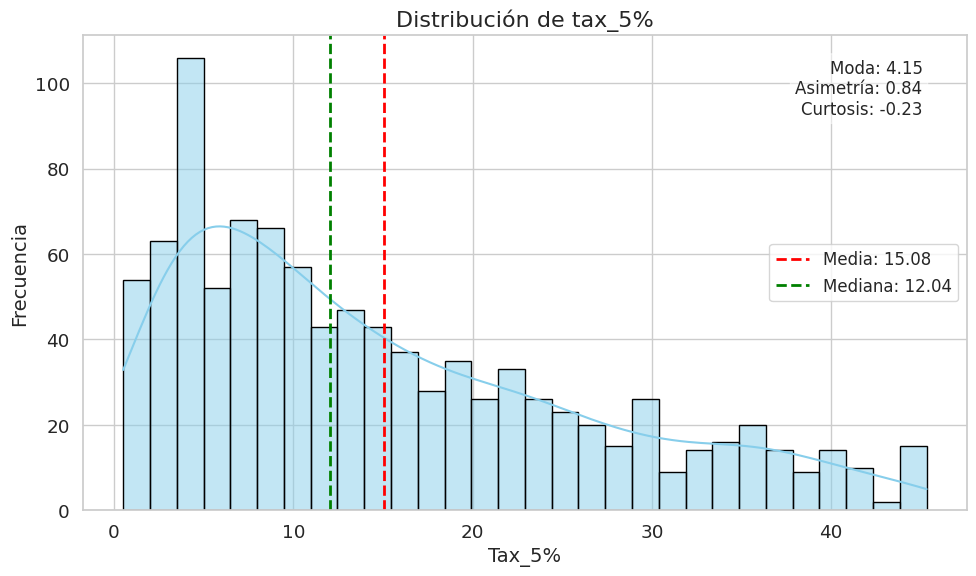


Análisis descriptivo de la variable: total
count    991.000000
mean     316.604752
std      237.709589
min       10.678500
25%      122.167500
50%      252.756000
75%      464.667000
max      951.825000
Name: total, dtype: float64
Mediana: 252.76
Moda: 87.23
Asimetría: 0.84
Curtosis: -0.23


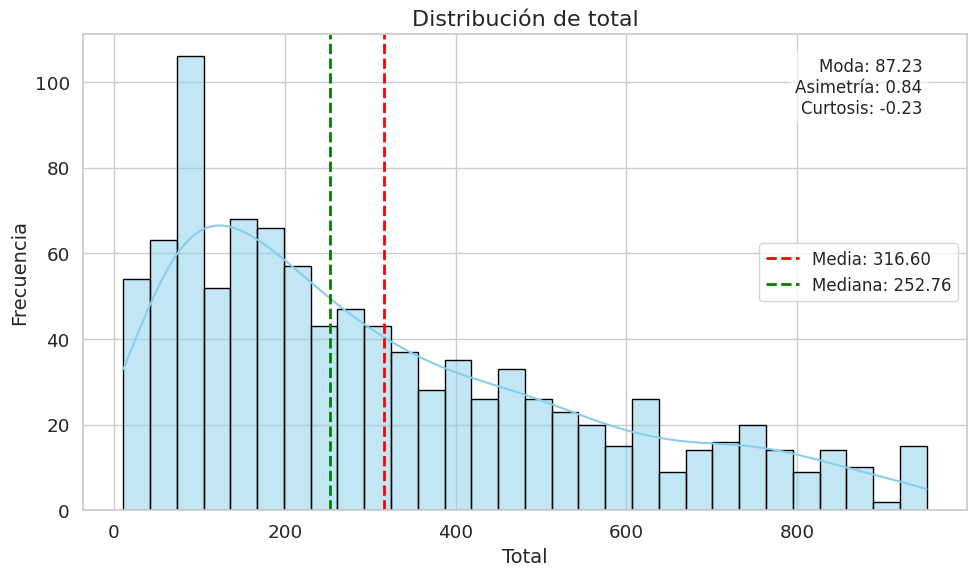


Análisis descriptivo de la variable: cogs
count    991.000000
mean     301.528335
std      226.390085
min       10.170000
25%      116.350000
50%      240.720000
75%      442.540000
max      906.500000
Name: cogs, dtype: float64
Mediana: 240.72
Moda: 83.08
Asimetría: 0.84
Curtosis: -0.23


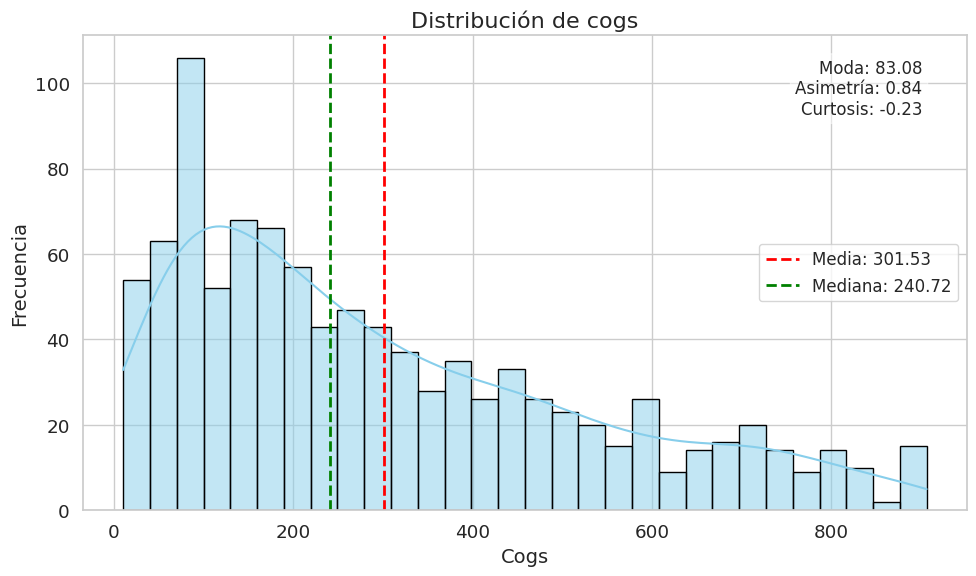


Análisis descriptivo de la variable: gross_margin_percentage
count    9.910000e+02
mean     4.761905e+00
std      6.131525e-14
min      4.761905e+00
25%      4.761905e+00
50%      4.761905e+00
75%      4.761905e+00
max      4.761905e+00
Name: gross_margin_percentage, dtype: float64
Mediana: 4.76
Moda: 4.76
Asimetría: 0.00
Curtosis: 0.00


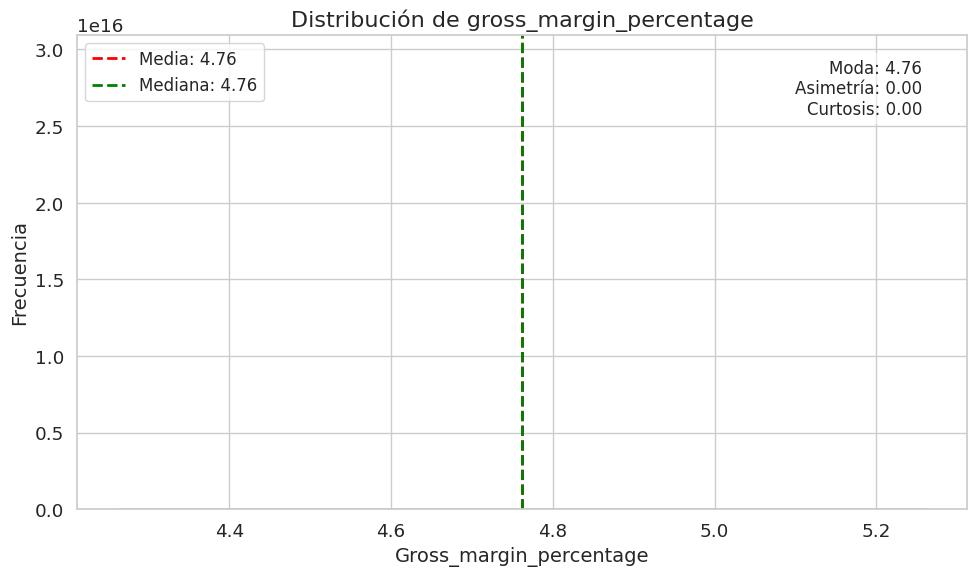


Análisis descriptivo de la variable: gross_income
count    991.000000
mean      15.076417
std       11.319504
min        0.508500
25%        5.817500
50%       12.036000
75%       22.127000
max       45.325000
Name: gross_income, dtype: float64
Mediana: 12.04
Moda: 4.15
Asimetría: 0.84
Curtosis: -0.23


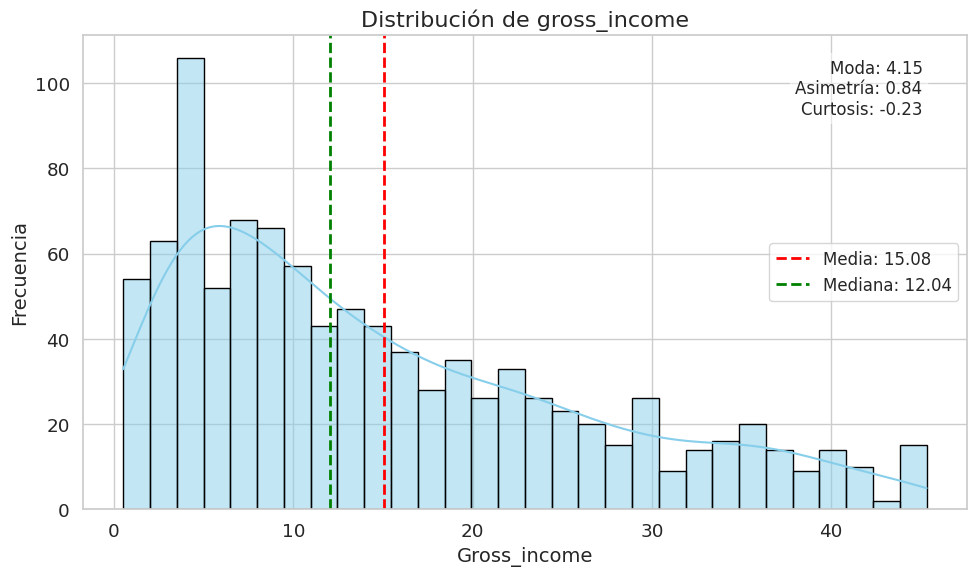


Análisis descriptivo de la variable: rating
count    991.000000
mean       6.979717
std        1.716957
min        4.000000
25%        5.500000
50%        7.000000
75%        8.500000
max       10.000000
Name: rating, dtype: float64
Mediana: 7.00
Moda: 6.00
Asimetría: 0.01
Curtosis: -1.15


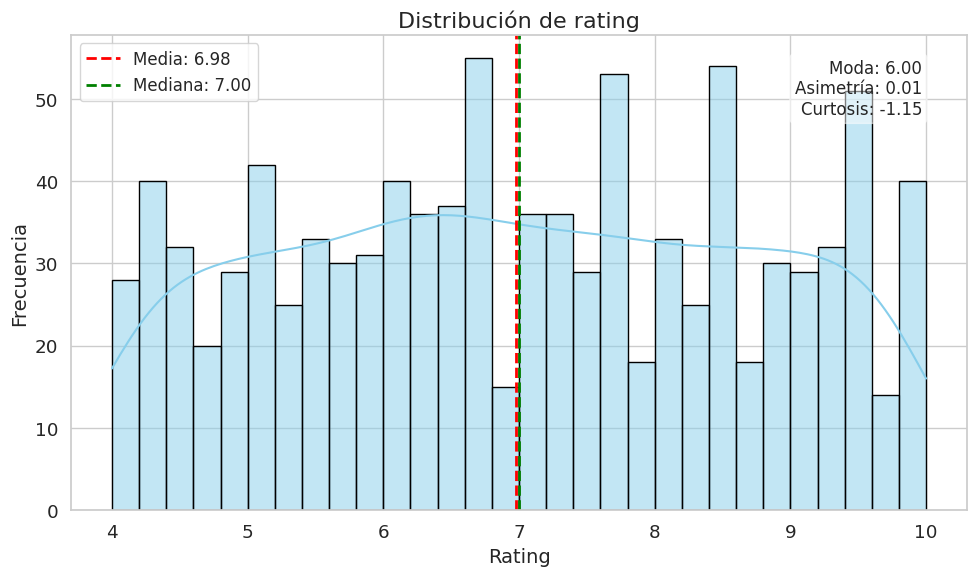

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='pastel', font_scale=1.2)

quantitative_columns = [
    'unit_price', 'quantity', 'tax_5%', 'total',
    'cogs', 'gross_margin_percentage', 'gross_income', 'rating'
]

for col in quantitative_columns:
    print(f"\nAnálisis descriptivo de la variable: {col}")

    # Estadísticas
    desc = df[col].describe()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0]
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()

    print(desc)
    print(f"Mediana: {median_val:.2f}")
    print(f"Moda: {mode_val:.2f}")
    print(f"Asimetría: {skewness:.2f}")
    print(f"Curtosis: {kurtosis:.2f}")

    # Verificar si la variable tiene varianza cero
    if df[col].std() == 0:
        # Todos los valores son iguales
        plt.figure(figsize=(8, 4))
        plt.title(f'{col.capitalize()} (Sin variabilidad)', fontsize=16)
        plt.text(0.5, 0.5, f"Todos los valores de '{col}' son {desc['mean']:.2f}",
                 ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)
        plt.axis('off')  # Quitar ejes, ya que no hay nada que graficar
        plt.show()
    else:
        # Crear histograma con KDE
        plt.figure(figsize=(10, 6))
        ax = sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Distribución de {col}', fontsize=16)
        plt.xlabel(col.capitalize(), fontsize=14)
        plt.ylabel("Frecuencia", fontsize=14)

        # Líneas verticales de media y mediana
        mean_val = df[col].mean()
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_val:.2f}')
        plt.legend(fontsize=12)

        # Recuadro con moda, asimetría y curtosis
        stats_text = f"Moda: {mode_val:.2f}\nAsimetría: {skewness:.2f}\nCurtosis: {kurtosis:.2f}"
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                 fontsize=12, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

        plt.tight_layout()
        plt.show()


# Análisis Descriptivo de Variables Cuantitativas

A continuación, se presenta la interpretación de cada variable numérica relevante en el dataset, basada en sus estadísticas descriptivas:

---

## 1. **Unit Price**
**(Precio unitario de cada producto en dólares)**

- **Media:** 55.29  
- **Desviación Estándar:** 26.31  
- **Mínimo:** 10.08  
- **Percentil 25%:** 32.67  
- **Mediana (50%):** 54.84  
- **Percentil 75%:** 77.49  
- **Máximo:** 99.96  
- **Moda:** 83.77  
- **Asimetría (Skewness):** 0.01  
- **Curtosis:** -1.21  

**Interpretación:**  
La media (55.29) y la mediana (54.84) son muy cercanas, indicando una distribución relativamente simétrica (skewness ≈ 0). El valor máximo (99.96) casi duplica al mínimo (10.08), lo que muestra una amplia gama de precios. La curtosis negativa (-1.21) sugiere una distribución más “plana” que la normal. La moda (83.77) es mayor que la mediana y la media, lo que indica un grupo de precios concentrado en un rango más alto, aunque no es el valor más frecuente a nivel global.

---

## 2. **Quantity**
**(Cantidad de productos comprados por cliente)**

- **Media:** 5.47  
- **Desviación Estándar:** 2.90  
- **Mínimo:** 1  
- **Percentil 25%:** 3  
- **Mediana (50%):** 5  
- **Percentil 75%:** 8  
- **Máximo:** 10  
- **Moda:** 1  
- **Asimetría (Skewness):** 0.02  
- **Curtosis:** -1.21  

**Interpretación:**  
La cantidad media de productos adquiridos es de 5.47, con un mínimo de 1 y un máximo de 10. La mediana (5) está muy cerca de la media, indicando que la distribución es casi simétrica. La moda (1) sugiere que el valor más frecuente es la compra de un solo producto. La curtosis negativa (-1.21) vuelve a mostrar una distribución más plana que la normal, con menor concentración de valores en las colas.

---

## 3. **Tax_5%**
**(Impuesto del 5% aplicado a la compra)**

- **Media:** 15.08  
- **Desviación Estándar:** 11.32  
- **Mínimo:** 0.51  
- **Percentil 25%:** 5.82  
- **Mediana (50%):** 12.04  
- **Percentil 75%:** 22.13  
- **Máximo:** 45.33  
- **Moda:** 4.15  
- **Asimetría (Skewness):** 0.84  
- **Curtosis:** -0.23  

**Interpretación:**  
El impuesto promedio es de 15.08 dólares, con un rango que va desde 0.51 hasta 45.33. La distribución está sesgada a la derecha (skewness = 0.84), lo que significa que hay compras con impuestos significativamente más altos que la media. La curtosis ligeramente negativa (-0.23) indica que la distribución no es tan “picuda” como la normal. La moda de 4.15 sugiere que los impuestos más pequeños son relativamente frecuentes, probablemente asociados a compras de bajo costo.

---

## 4. **Total**
**(Precio total de la compra, incluyendo impuestos)**

- **Media:** 316.60  
- **Desviación Estándar:** 237.71  
- **Mínimo:** 10.68  
- **Percentil 25%:** 122.17  
- **Mediana (50%):** 252.76  
- **Percentil 75%:** 464.67  
- **Máximo:** 951.83  
- **Moda:** 87.23  
- **Asimetría (Skewness):** 0.84  
- **Curtosis:** -0.23  

**Interpretación:**  
La compra total promedio es de 316.60 dólares, con valores que oscilan desde 10.68 hasta 951.83, evidenciando alta variabilidad. La distribución está sesgada a la derecha (skewness = 0.84), lo que indica que hay un grupo de compras con montos notablemente mayores a la media. La curtosis (-0.23) sugiere que la distribución es un poco más plana de lo normal. El valor de moda (87.23) refleja transacciones de menor monto, pero no es la mayoría de los casos, dado el amplio rango de precios.

---

## 5. **COGS**
**(Cost of Goods Sold - Costo de los bienes vendidos)**

- **Media:** 301.53  
- **Desviación Estándar:** 226.39  
- **Mínimo:** 10.17  
- **Percentil 25%:** 116.35  
- **Mediana (50%):** 240.72  
- **Percentil 75%:** 442.54  
- **Máximo:** 906.50  
- **Moda:** 83.08  
- **Asimetría (Skewness):** 0.84  
- **Curtosis:** -0.23  

**Interpretación:**  
El costo de los productos vendidos presenta una media de 301.53 dólares, y un rango entre 10.17 y 906.50. La distribución es muy similar a la de la variable `total`, ya que ambas están relacionadas directamente. La asimetría positiva (0.84) y la curtosis ligeramente negativa (-0.23) indican una distribución con una cola derecha más larga y un pico algo aplanado. La moda (83.08) señala la existencia de varias compras con costo relativamente bajo, pero no es representativa de la mayoría.

---

## 6. **Gross Margin Percentage**
**(Porcentaje de margen bruto)**

- **Media:** 4.76  
- **Desviación Estándar:** ~0  
- **Mínimo:** 4.76  
- **Percentil 25%:** 4.76  
- **Mediana (50%):** 4.76  
- **Percentil 75%:** 4.76  
- **Máximo:** 4.76  
- **Moda:** 4.76  
- **Asimetría (Skewness):** 0.00  
- **Curtosis:** 0.00  

**Interpretación:**  
Esta variable es **constante** en todo el conjunto de datos. El margen bruto del 4.76% se aplica uniformemente a todas las ventas, por lo que no existe variación ni dispersión. Esto explica la desviación estándar cercana a cero, y que todos los estadísticos (media, mediana, moda) coincidan en 4.76.

---

## 7. **Gross Income**
**(Ingreso bruto por transacción)**

- **Media:** 15.08  
- **Desviación Estándar:** 11.32  
- **Mínimo:** 0.51  
- **Percentil 25%:** 5.82  
- **Mediana (50%):** 12.04  
- **Percentil 75%:** 22.13  
- **Máximo:** 45.33  
- **Moda:** 4.15  
- **Asimetría (Skewness):** 0.84  
- **Curtosis:** -0.23  

**Interpretación:**  
El ingreso bruto medio es de 15.08 dólares, con valores que van desde tan solo 0.51 hasta 45.33. Al igual que `tax_5%` y `total`, muestra asimetría positiva (0.84), indicando un sesgo hacia la derecha por transacciones de mayor ingreso. La curtosis (-0.23) sugiere una distribución más dispersa y menos “concentrada” que la normal. La moda (4.15) coincide con el valor modal del impuesto, reflejando que las compras pequeñas (y por ende, menor ingreso bruto) son relativamente frecuentes.

---

## 8. **Rating**
**(Calificación de la experiencia de compra en escala 1 a 10)**

- **Media:** 6.98  
- **Desviación Estándar:** 1.72  
- **Mínimo:** 4.00  
- **Percentil 25%:** 5.50  
- **Mediana (50%):** 7.00  
- **Percentil 75%:** 8.50  
- **Máximo:** 10.00  
- **Moda:** 6.00  
- **Asimetría (Skewness):** 0.01  
- **Curtosis:** -1.15  

**Interpretación:**  
La calificación promedio de los clientes es cercana a 7, lo que sugiere un **nivel de satisfacción mayoritariamente positivo**. La asimetría casi nula (0.01) indica una distribución muy próxima a la simetría, mientras que la curtosis negativa (-1.15) revela una dispersión moderada en torno a la media. La moda (6) se sitúa cerca de la media y mediana, por lo que no hay indicios de concentraciones anómalas de calificaciones.

---

### **Conclusiones Generales**
1. **Unit Price, Quantity, Tax_5%, Total, COGS y Gross Income** comparten una distribución **ligeramente sesgada a la derecha**, mostrando la presencia de algunas compras de alto valor o volumen.  
2. **Gross Margin Percentage** es **constante** (4.76%) a lo largo de todas las transacciones, lo que sugiere una política uniforme de márgenes de ganancia.  
3. **Rating** indica una **satisfacción mayormente positiva** de los clientes, con valores cercanos a 7 en promedio y sin grandes sesgos en la distribución.  

Este análisis sienta las bases para profundizar en correlaciones, segmentaciones y posibles modelos predictivos basados en las características del comportamiento de compra de los clientes.


**Analisis de Correlación**

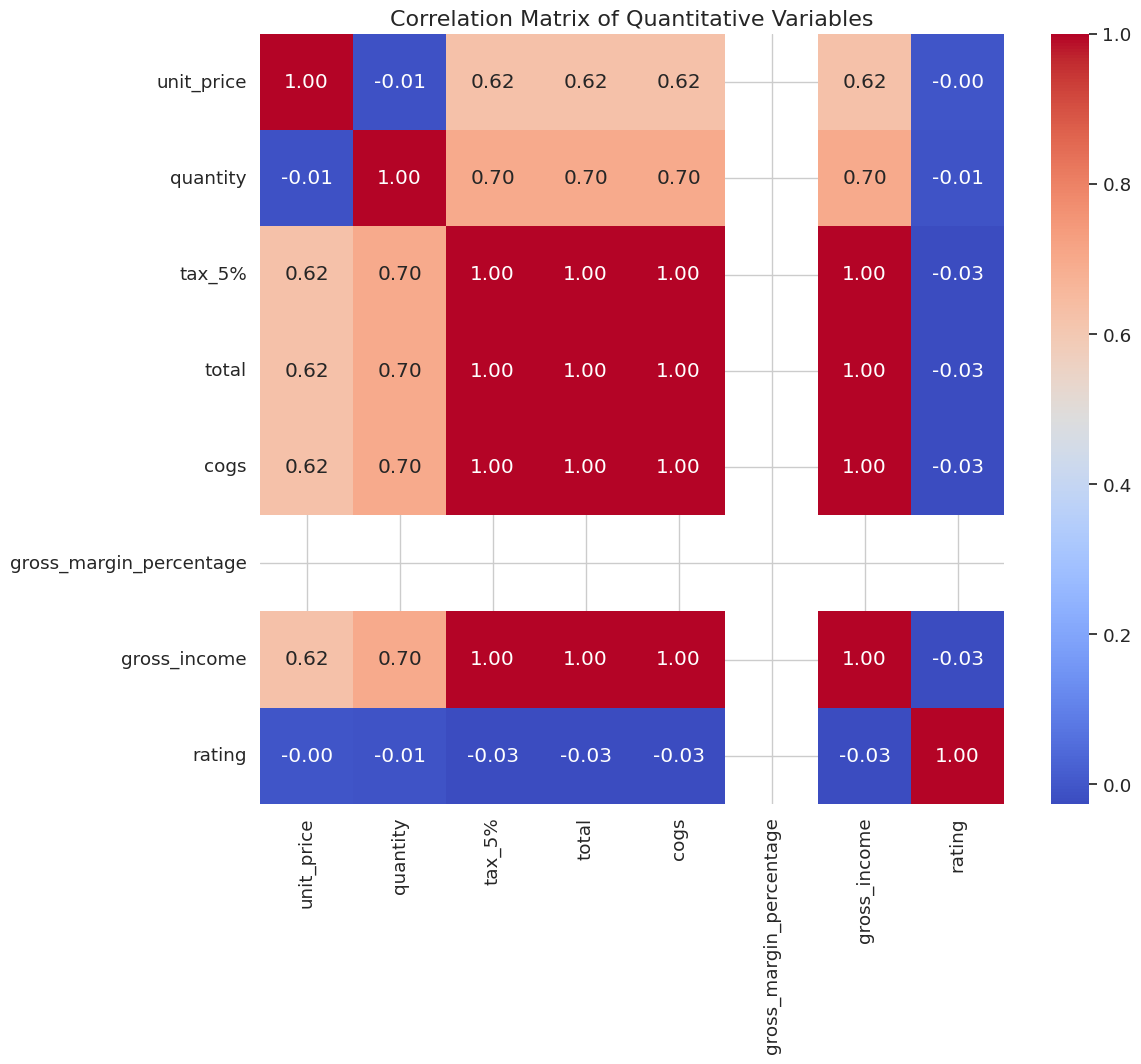


Correlation Matrix:


,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
unit_price,1.000000,-0.011506,0.623355,0.623355,0.623355,NaN,0.623355,-0.002527
quantity,-0.011506,1.000000,0.699290,0.699290,0.699290,NaN,0.699290,-0.009694
tax_5%,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
total,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
cogs,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
gross_margin_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
rating,-0.002527,-0.009694,-0.026092,-0.026092,-0.026092,NaN,-0.026092,1.000000


In [16]:
# prompt: correlacion de las variable de quantitative_columns

# Calculate the correlation matrix
correlation_matrix = df[quantitative_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Quantitative Variables', fontsize=16)
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix

## Interpretación Detallada

### 1. Variables Altamente Correlacionadas
- **`tax_5%`, `total`, `cogs` y `gross_income`:**  
  Todas estas variables tienen correlaciones perfectas (valor de 1.000) entre sí, lo que sugiere que están estrechamente relacionadas o incluso son derivadas unas de otras. Esto es lógico, ya que el impuesto, el total de la venta, el costo de bienes vendidos y el ingreso bruto suelen estar interrelacionados en el proceso de venta.

- **`unit_price` y `tax_5%` (y variables derivadas):**  
  La correlación de 0.623 entre `unit_price` y `tax_5%` (así como con `total`, `cogs` y `gross_income`) indica una relación moderada a fuerte. Esto sugiere que, en general, los productos de mayor precio tienden a tener impuestos y totales mayores.

- **`quantity` con `tax_5%`, `total`, `cogs` y `gross_income`:**  
  Con una correlación de aproximadamente 0.699, se evidencia que al aumentar la cantidad de productos vendidos, también se incrementan proporcionalmente estos montos, lo cual es coherente con el proceso de ventas.

### 2. Relaciones Nulas o Prácticamente Nulas
- **`unit_price` vs. `quantity`:**  
  La correlación es de -0.011, lo que indica prácticamente **ninguna relación lineal** entre el precio unitario y la cantidad de productos vendidos. Esto sugiere que el precio de un producto no influye en la cantidad comprada.

- **`rating` (Calificación de experiencia):**  
  La variable `rating` muestra correlaciones muy bajas (cercanas a 0) con todas las demás variables (por ejemplo, -0.0025 con `unit_price` y -0.026 con `tax_5%`, `total`, `cogs` y `gross_income`). Esto indica que la satisfacción del cliente, medida a través del rating, **no se asocia linealmente** con los montos o cantidades de la transacción.

### 3. Variable Constante
- **`gross_margin_percentage`:**  
  Las correlaciones para `gross_margin_percentage` son NaN porque esta variable es constante en el dataset (todos los registros tienen el mismo valor, 4.76%). Esto impide calcular una correlación, ya que **no hay variabilidad** en sus datos.

---

## Análisis Bivariable Recomendado

Dada la baja correlación de `rating` con todas las demás variables, resulta interesante realizar un **análisis bivariable adicional** para explorar posibles relaciones no lineales o efectos moderadores. Se recomienda examinar la relación entre:

- **`rating` vs. `total`:**  
  Aunque la correlación lineal es muy baja, podría existir una relación no lineal o segmentada que influya en la satisfacción del cliente en función del monto total de la compra. Para este análisis, se pueden utilizar gráficos de dispersión (scatter plots), diagramas de cajas (box plots) o incluso técnicas de segmentación para identificar grupos de clientes con comportamientos diferentes.

Este análisis complementario ayudará a identificar patrones o relaciones que no sean evidentes mediante un simple cálculo de correlación, permitiendo profundizar en el comportamiento de los clientes y la experiencia de compra.

---

# **Análisis Bivariable**

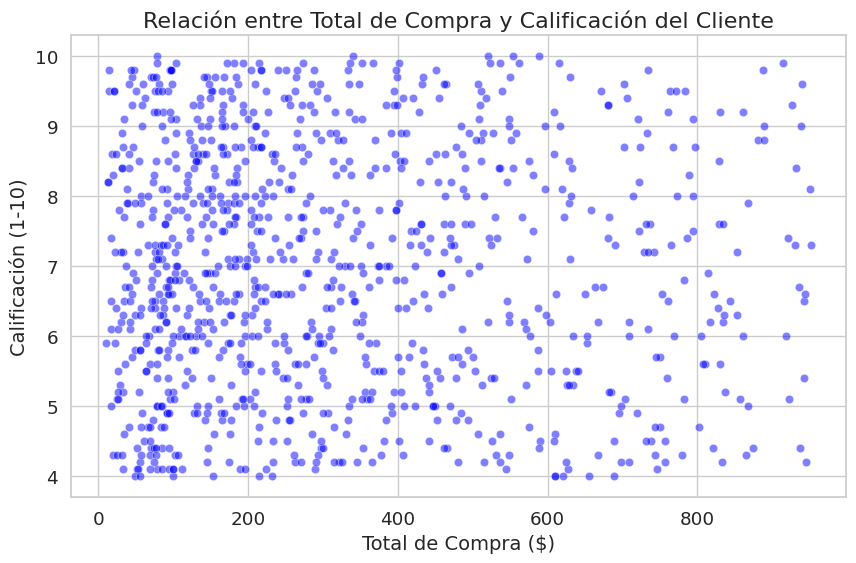

In [17]:
# Configuración de estilo para gráficos
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

### 1️⃣ Análisis de la relación entre 'rating' y 'total' ###

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["total"], y=df["rating"], alpha=0.5, color="blue")
plt.title("Relación entre Total de Compra y Calificación del Cliente", fontsize=16)
plt.xlabel("Total de Compra ($)", fontsize=14)
plt.ylabel("Calificación (1-10)", fontsize=14)
plt.show()

In [18]:
# Cálculo de correlación entre rating y total
corr_value = df["total"].corr(df["rating"])
print(f"Correlación entre 'rating' y 'total': {corr_value:.4f}")

Correlación entre 'rating' y 'total': -0.0261


<ipython-input-19-2486e16dbfd3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["rating"], palette="coolwarm")


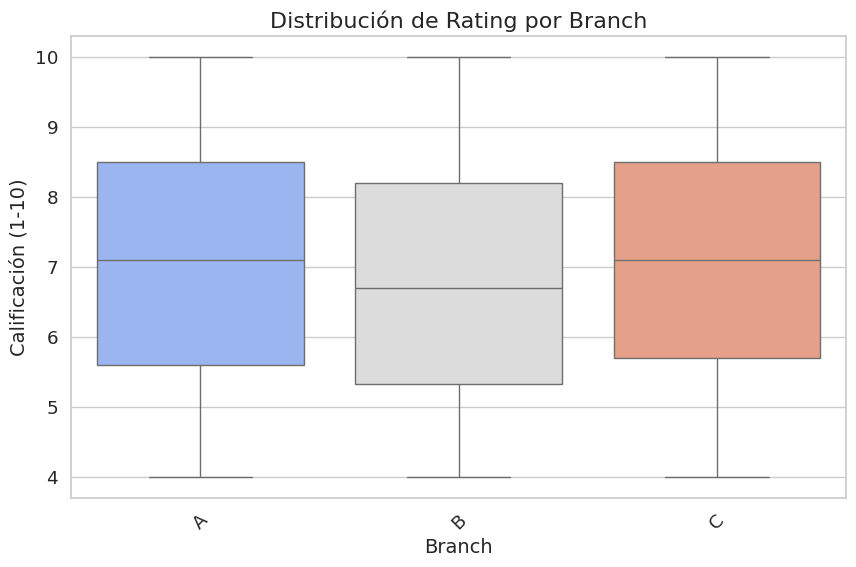

<ipython-input-19-2486e16dbfd3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["rating"], palette="coolwarm")


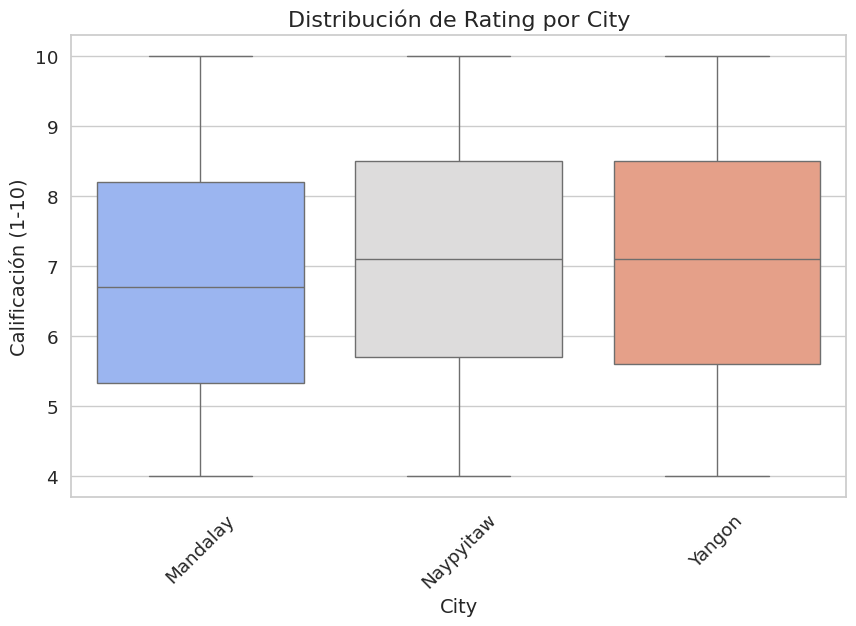

<ipython-input-19-2486e16dbfd3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["rating"], palette="coolwarm")


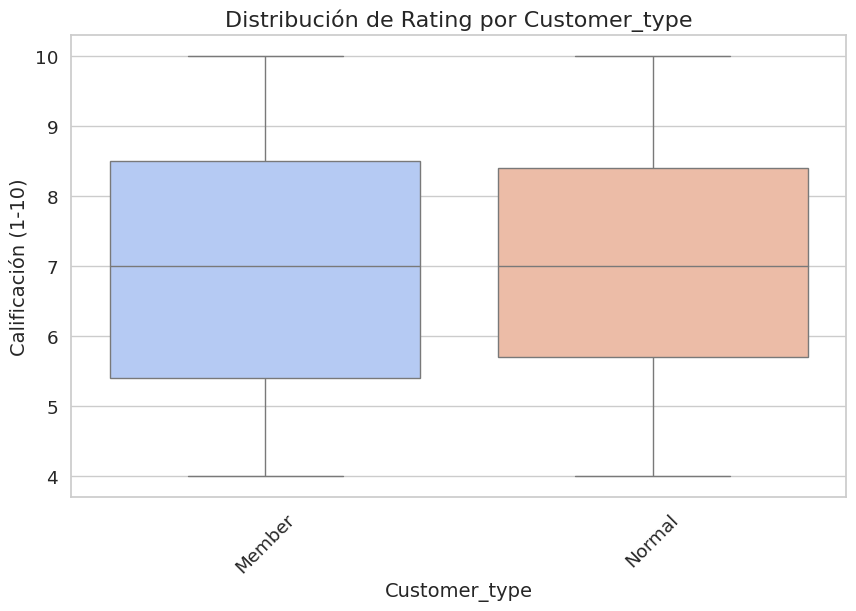

<ipython-input-19-2486e16dbfd3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["rating"], palette="coolwarm")


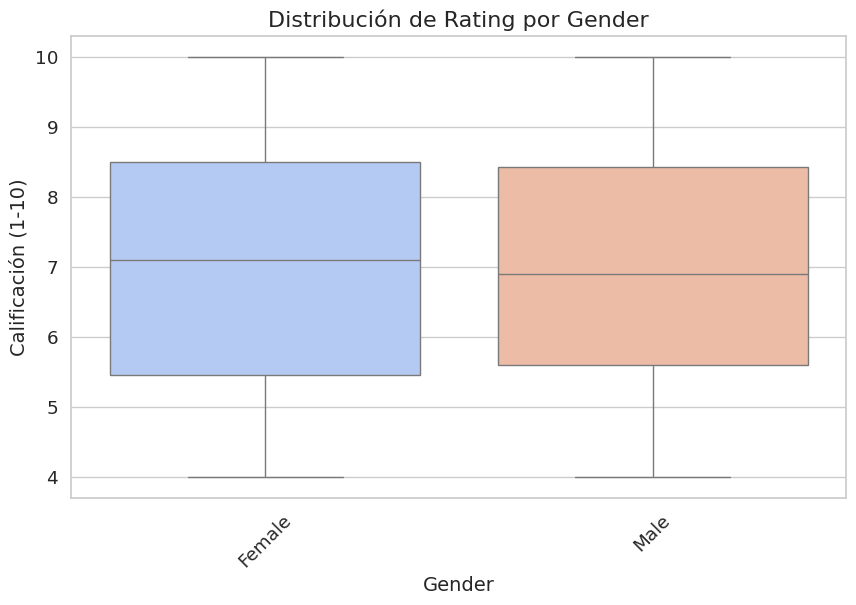

<ipython-input-19-2486e16dbfd3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["rating"], palette="coolwarm")


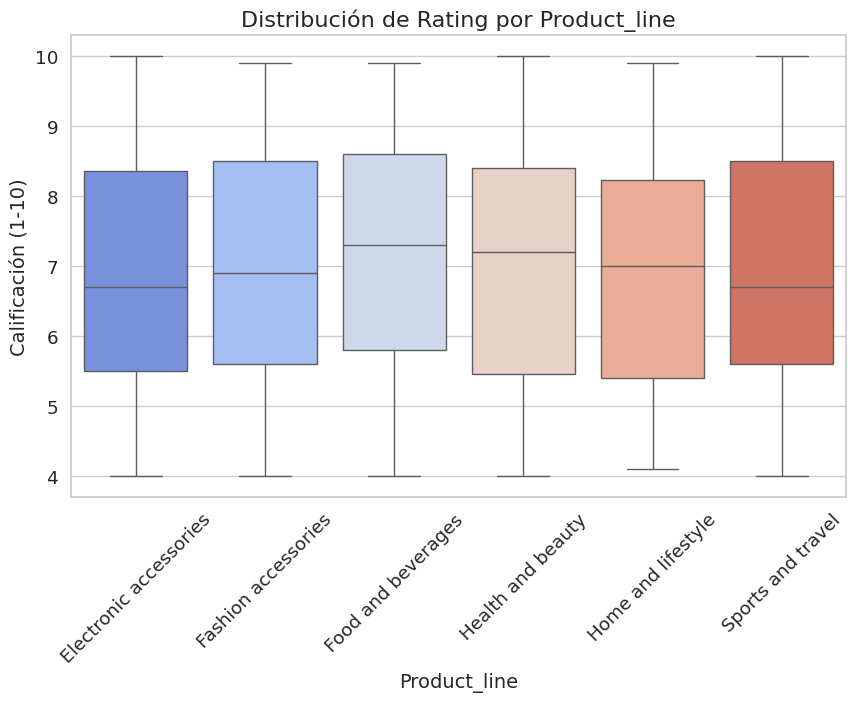

<ipython-input-19-2486e16dbfd3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["rating"], palette="coolwarm")


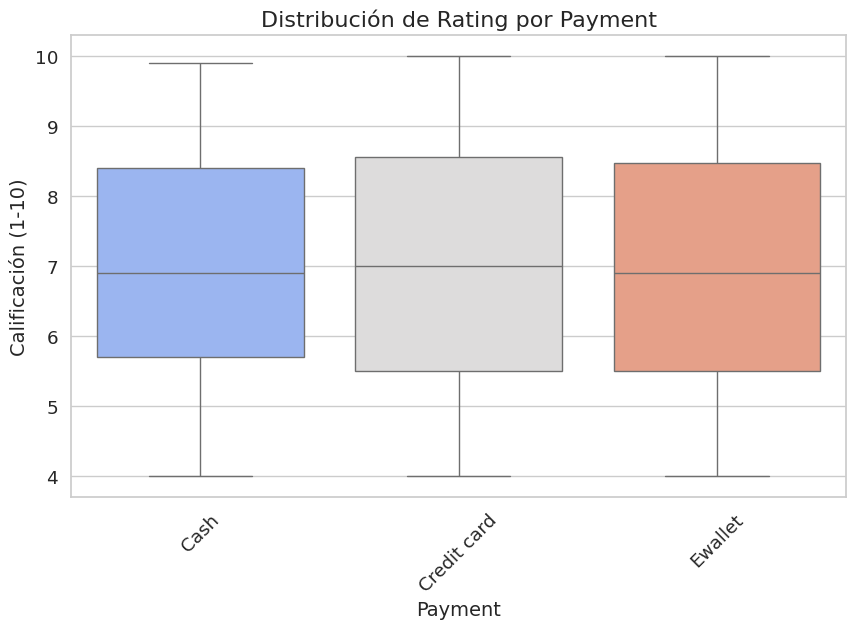

In [19]:
### 2️⃣ Análisis de 'rating' con variables categóricas ###

categorical_columns = ['branch', 'city', 'customer_type', 'gender', 'product_line', 'payment']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df["rating"], palette="coolwarm")
    plt.title(f"Distribución de Rating por {col.capitalize()}", fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel("Calificación (1-10)", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

# Conclusiones Consolidadas del Análisis de Datos

A partir del análisis descriptivo y bivariable realizado, se extraen las siguientes conclusiones:

- **Variables Cuantitativas:**
  - **Precio Unitario, Cantidad, Impuesto, Total, COGS y Gross Income:**  
    Presentan distribuciones ligeramente sesgadas a la derecha, lo que indica la presencia de algunas transacciones de alto valor o mayor volumen. Sin embargo, las medidas centrales (media y mediana) se mantienen en rangos consistentes, permitiendo un análisis robusto.
  - **Gross Margin Percentage:**  
    Es una variable constante (4.76%) en todos los registros, lo que sugiere una política uniforme de margen bruto en la compañía.
  - **Rating (Calificación):**  
    Se distribuye de forma simétrica con una media cercana a 7, indicando una satisfacción mayoritariamente positiva entre los clientes.

- **Correlación entre Variables:**
  - Las variables relacionadas al proceso de venta (tax_5%, total, COGS y gross_income) muestran correlaciones perfectas o muy altas, reflejando su interdependencia en el cálculo de la transacción.
  - No existe correlación significativa entre el precio unitario y la cantidad, lo que indica que el precio de un producto no afecta directamente la cantidad comprada.
  - La calificación de los clientes (rating) muestra correlaciones prácticamente nulas con las demás variables, sugiriendo que la experiencia de compra no se ve afectada de manera lineal por el monto total o el volumen de la transacción.

- **Análisis Bivariable:**
  - El gráfico de dispersión entre `total` y `rating` confirma la ausencia de una relación lineal directa entre el monto de compra y la satisfacción del cliente.
  - Los boxplots de `rating` en función de variables categóricas (branch, city, customer_type, gender, product_line, payment) permiten identificar posibles diferencias en la experiencia de compra entre distintos segmentos, lo cual es clave para profundizar en análisis segmentados o en estrategias de marketing focalizadas.

---

**Conclusión General:**  
El dataset revela que, a pesar de la diversidad en los montos y volúmenes de compra, la política de margen es uniforme y la satisfacción del cliente se mantiene en un nivel positivo sin estar influenciada directamente por el gasto. Además, la interrelación entre variables transaccionales refuerza la consistencia en el proceso de venta, mientras que el análisis de variables categóricas abre la puerta a estrategias específicas para mejorar la experiencia de compra en determinados segmentos.